In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [183]:
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# **EDA**

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [185]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [186]:
#renaming columns for simplicity
data1=data.rename({'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MS'},axis=1)
data1

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [187]:
#checking for any duplicate values
data1[data1.duplicated()]

,RD,AD,MS,State,Profit


# **CORRELATION ANALYSIS**

In [188]:
data1.corr()

<ipython-input-188-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RD,AD,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


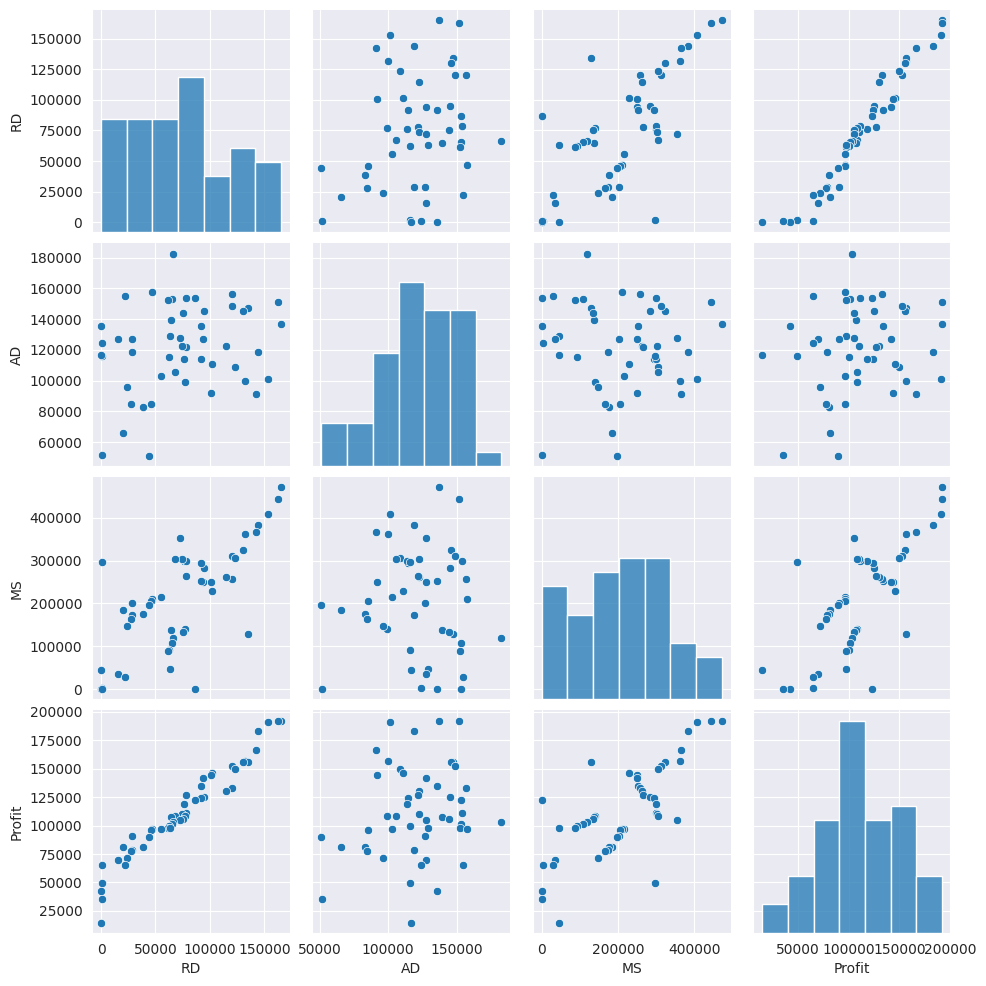

In [145]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# **MODEL**

In [189]:
model=smf.ols("Profit~RD+AD+MS",data=data1).fit()

In [190]:
print(model.params)
print(model.tvalues,np.round(model.pvalues,5))
print(model.rsquared,model.rsquared_adj)

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64
Intercept     7.626218
RD           17.846374
AD           -0.525507
MS            1.655077
dtype: float64 Intercept    0.00000
RD           0.00000
AD           0.60176
MS           0.10472
dtype: float64
0.9507459940683246 0.9475337762901719


In [110]:
#model accuracy is 95.07%
#building simple linear regression models for AD & MS

In [191]:
model1=smf.ols("Profit~AD",data=data1).fit()
model1.tvalues,model1.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [192]:
model2=smf.ols("Profit~MS",data=data1).fit()
model2.tvalues,model2.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [113]:
#as we can clearly see that p values of AD are insignificant as compared to MS

In [193]:
model3=smf.ols('Profit~AD+MS',data=data1).fit()
model3.tvalues,model3.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

In [115]:
#here the model3 has significant values

# **CALCULATING VIF VALUES**

In [151]:
rsq_r=smf.ols("RD~AD+MS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("AD~RD+MS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RD+AD",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD','AD','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


In [117]:
#here no variables have VIF>20, hence there is no collinearity

# **Checking for AIC values**

In [168]:
#building model with AD
model_ad=smf.ols('Profit~RD+AD',data=data1).fit()
print(model_ad.rsquared,model_ad.aic)

0.9478129385009173 1059.6636934567293


In [169]:
#building model with MS
model_ms=smf.ols('Profit~RD+MS',data=data1).fit()
print(model_ms.rsquared,model_ms.aic)

0.9504503015559763 1057.070772191826


# **RESIDUAL ANALYSIS**

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

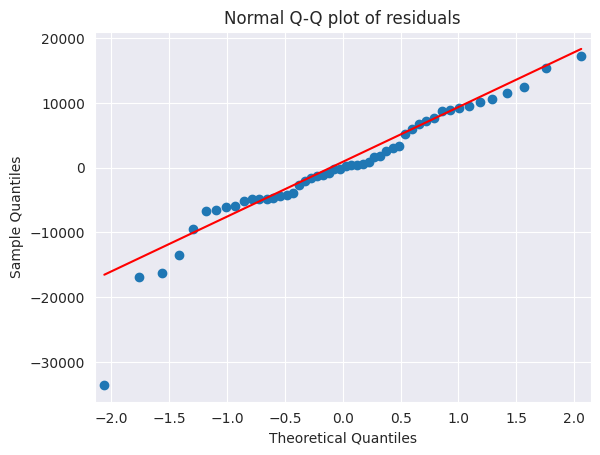

In [154]:
sm.qqplot(model.resid,line='q');
plt.title("Normal Q-Q plot of residuals")

In [155]:
#as we can clearly see an outlier below -30000 quants, we'll find the point and remove it.
list(np.where(model.resid<-30000))

[array([49])]

Text(0, 0.5, 'error')

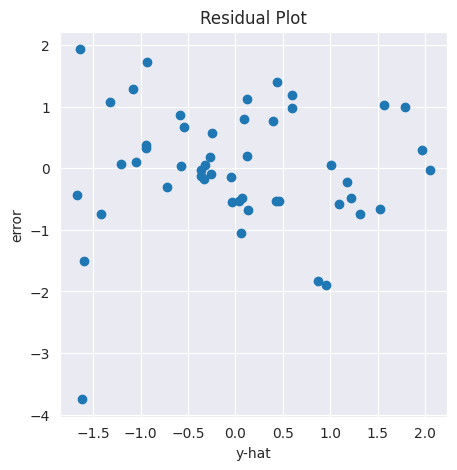

In [156]:
#residual plot for homosedasticity
def get_std_values(vals):
  return(vals-vals.mean())/vals.std() #z-score formula

plt.figure(figsize=(5,5));
plt.scatter(get_std_values(model.fittedvalues), #fittedvalues is y hat, mode.resid is error values
            get_std_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('y-hat')
plt.ylabel('error')

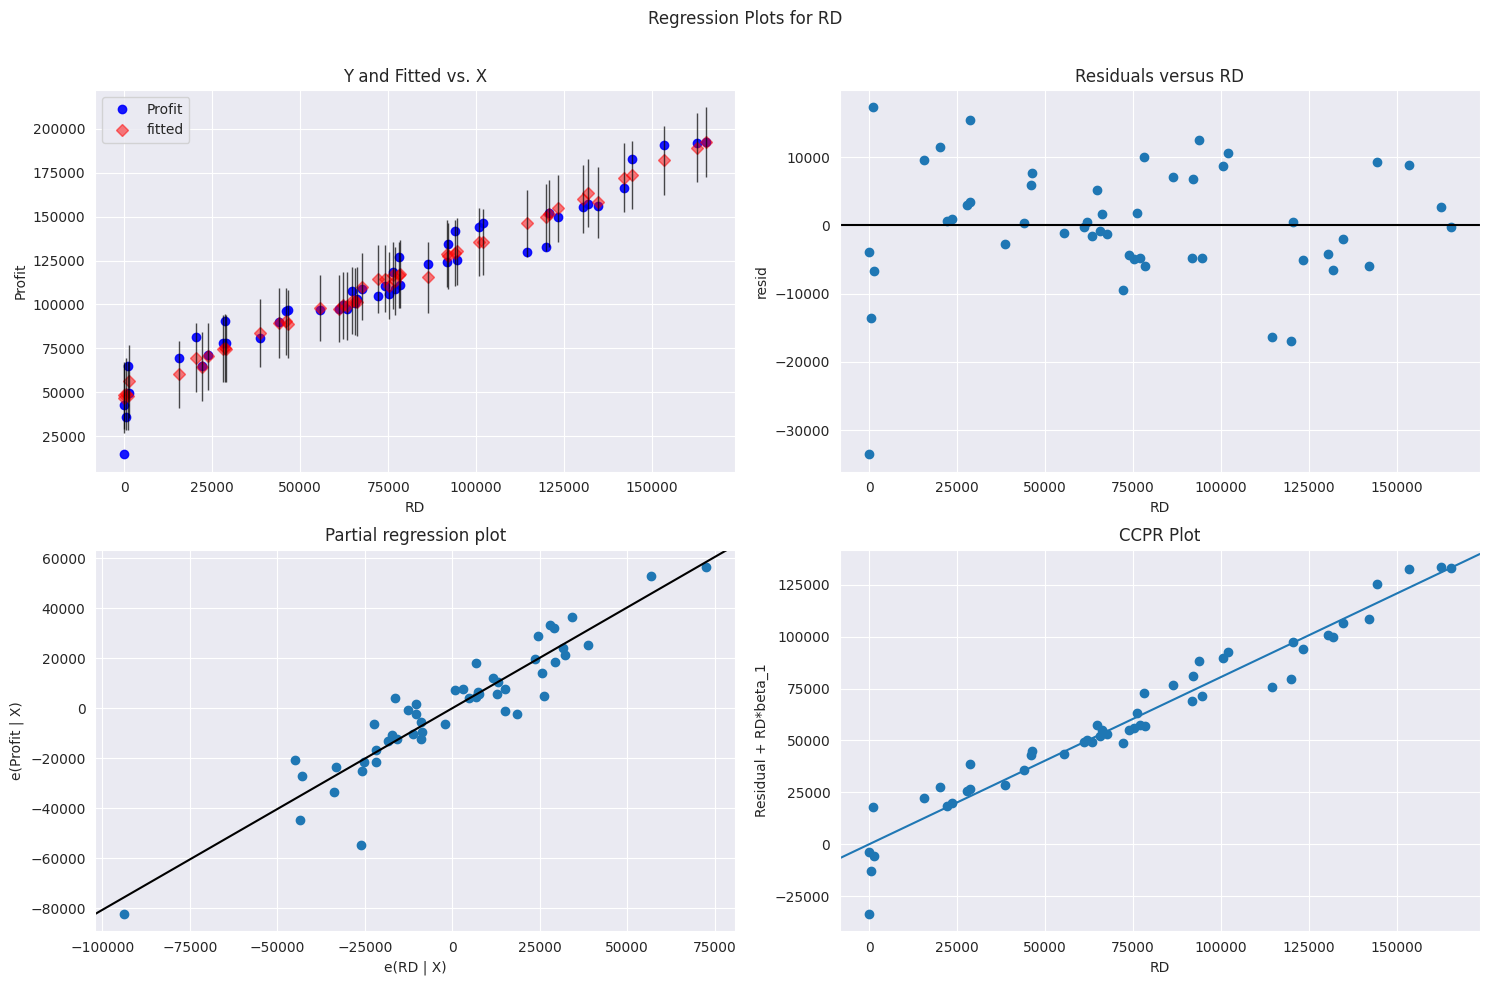

In [123]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'RD',fig=fig)

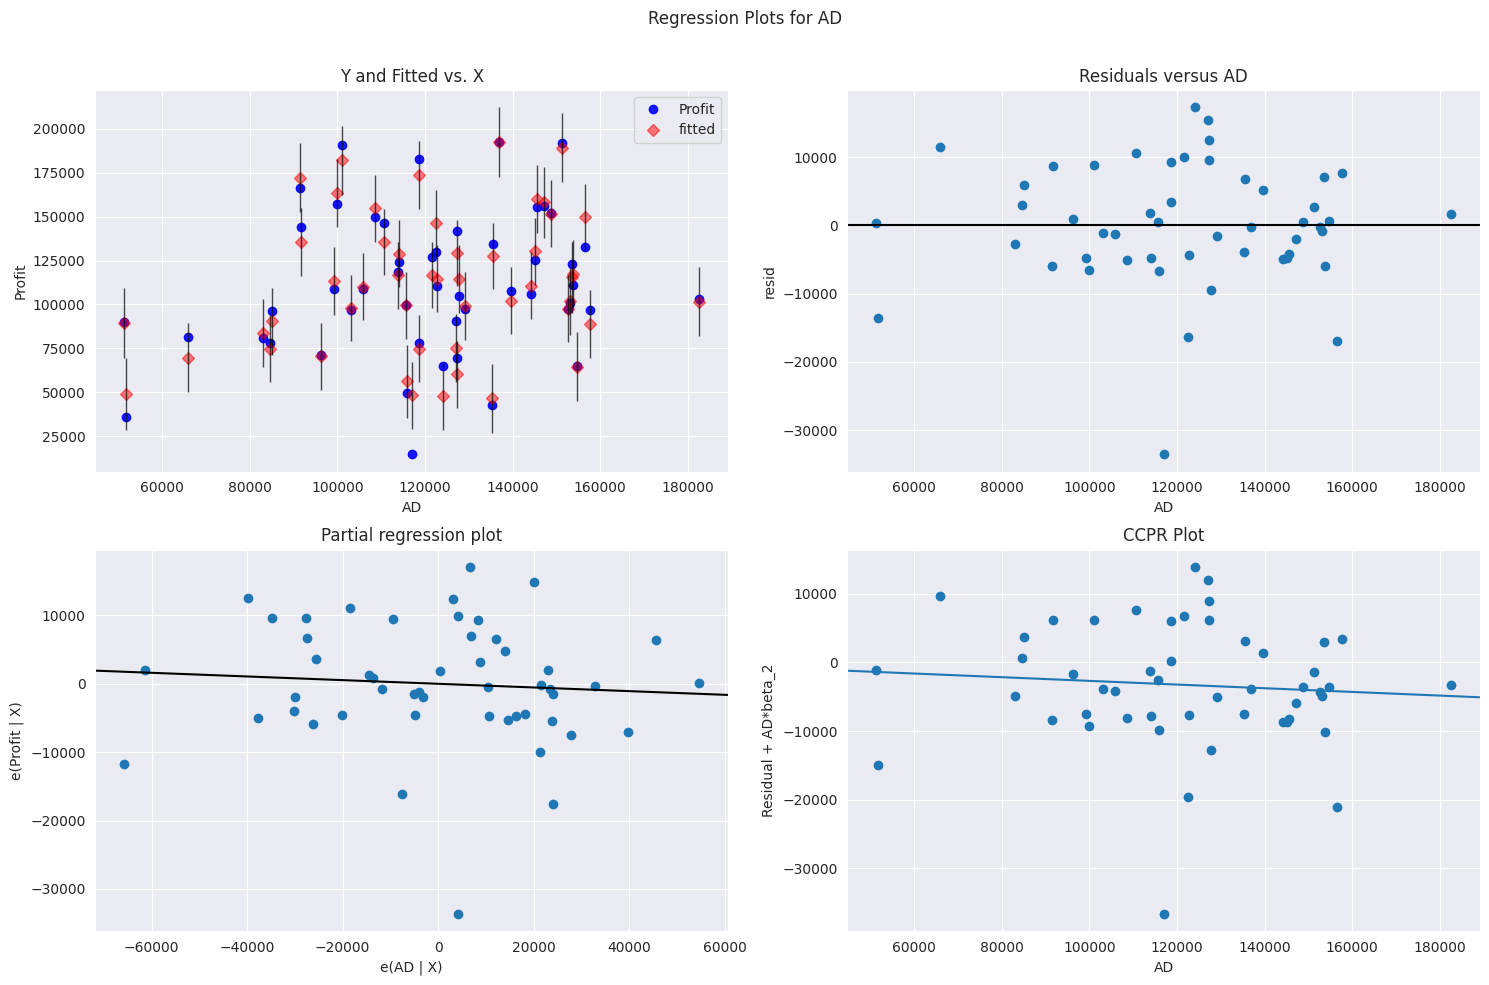

In [124]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'AD',fig=fig)

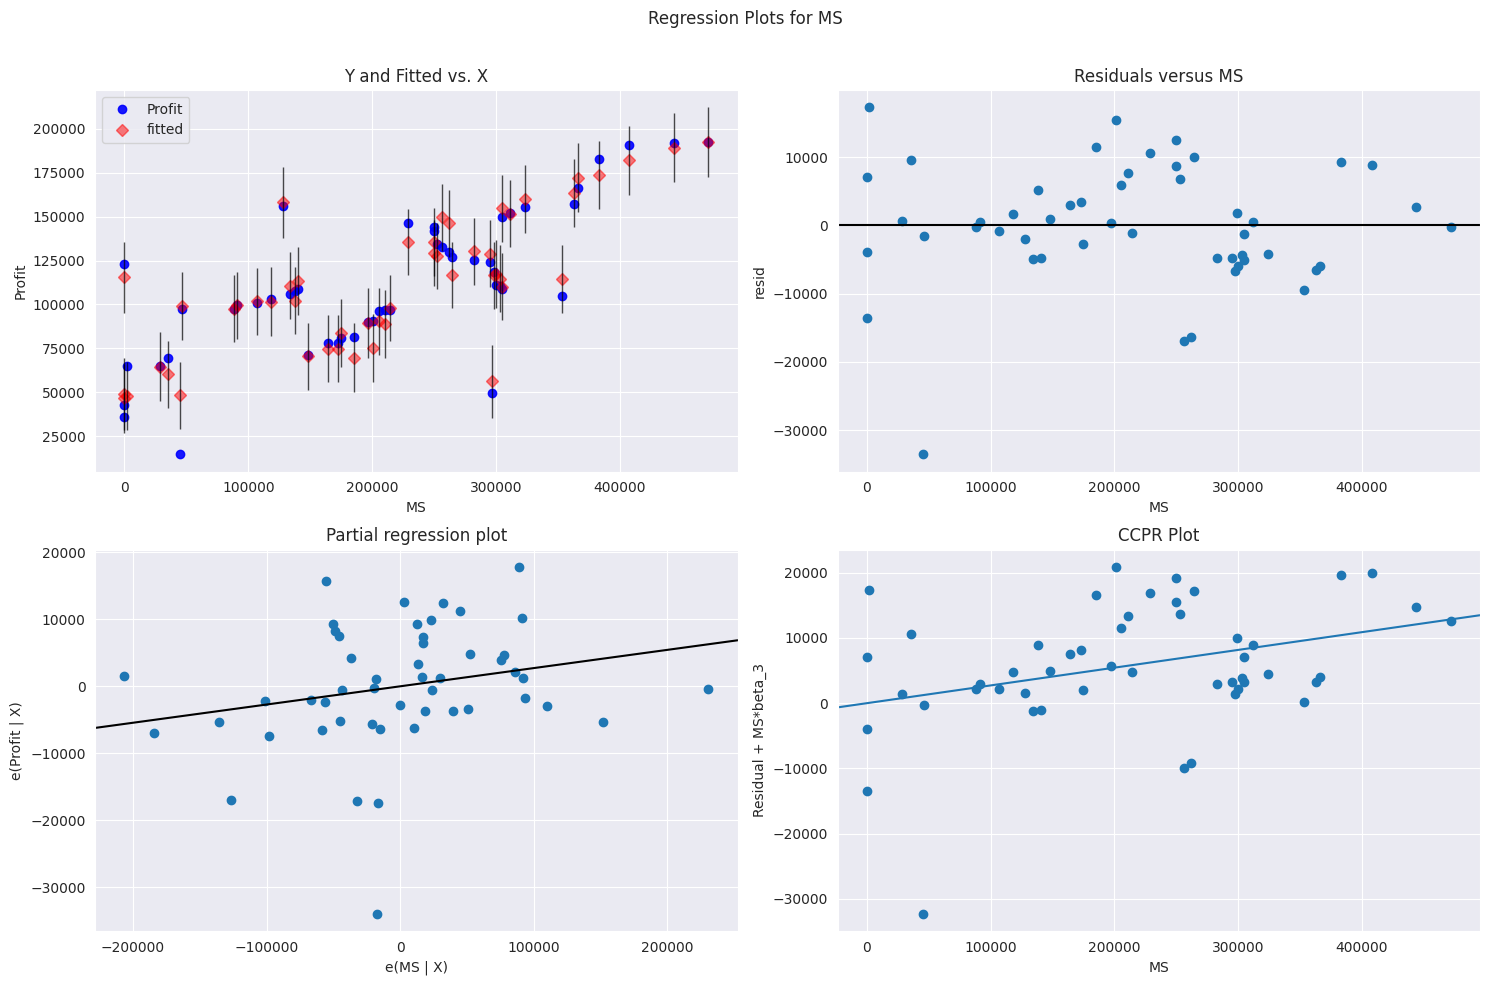

In [125]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'MS',fig=fig)

# **Model Deletion Diagnostics**

In [157]:
#cook's distance
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Text(0, 0.5, 'Cooks Distance')

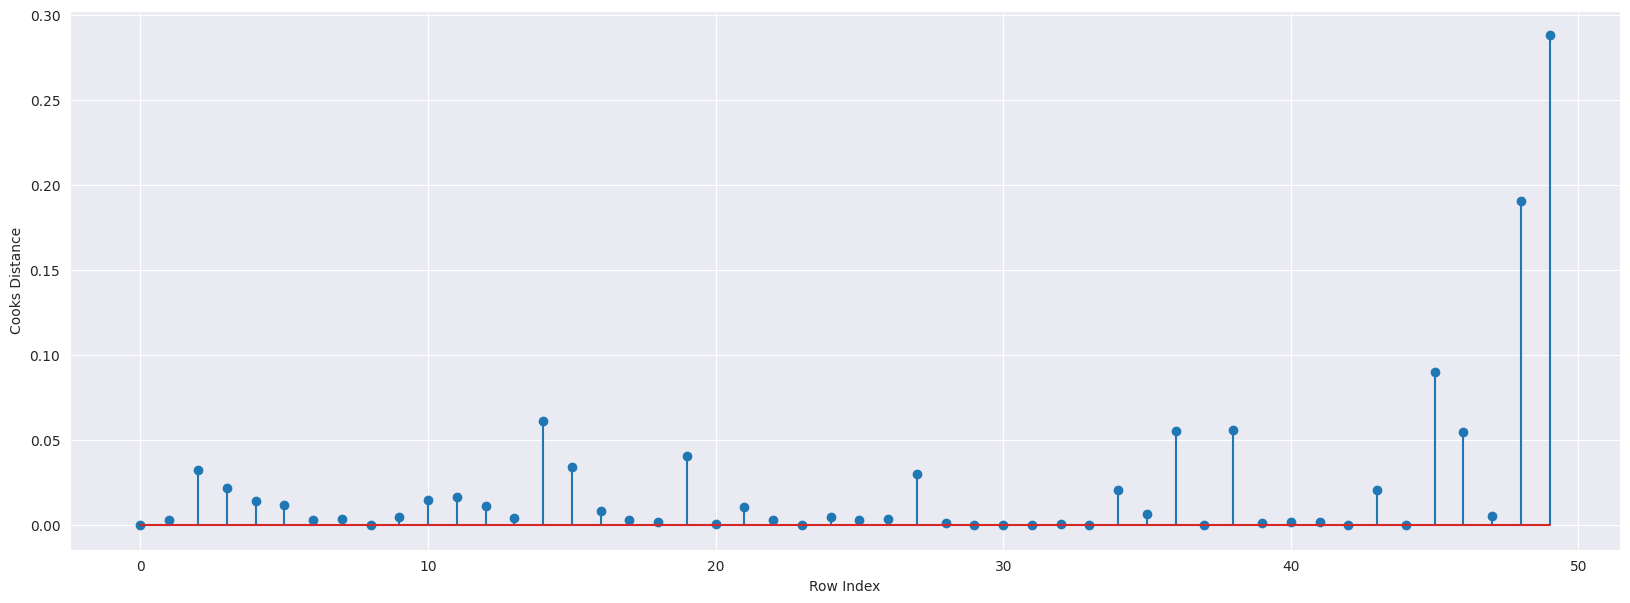

In [158]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [159]:
#finding the value of 49th outlier point
data1[data1.index.isin([49])]

,RD,AD,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# **Model Improvement**

In [160]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [161]:
#performing model deletion technique again to check for more outliers
model=smf.ols("Profit~RD+AD+MS",data=data2).fit()
(c,_)=model.get_influence().cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

Text(0, 0.5, 'Cooks Distance')

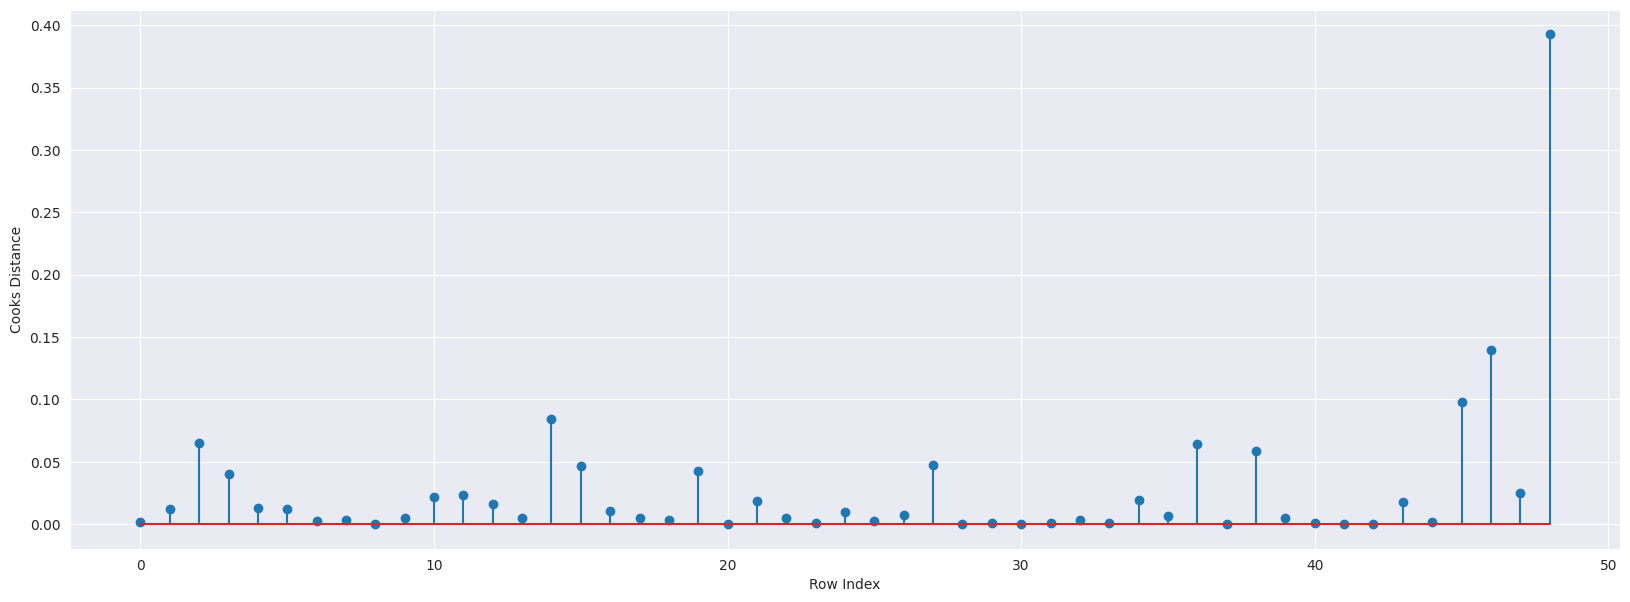

In [162]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [194]:
#building the new model
new_model=smf.ols("Profit~RD+AD+MS",data=data2).fit()
new_model.rsquared , new_model.aic

(0.9882757054424702, 515.7400263290039)

In [133]:
#the model accuracy as well as AIC values have improved on a greater scale.

# **Model Predictions**

In [196]:
new_data=pd.DataFrame({'RD':73000,"AD":92000,"MS":144000},index=[0])
new_data

,RD,AD,MS
0,73000,92000,144000


In [195]:
#manual prediction
new_model.predict(new_data)

0    107179.810395
dtype: float64

In [198]:
#automatic prediction on data2
pred_y=new_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [199]:
new_model2=smf.ols("Profit~RD+AD+MS",data=data2).fit()

In [200]:
while new_model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        new_model2=smf.ols("Profit~RD+AD+MS",data=data2).fit()
        (c,_)=new_model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        new_model2=smf.ols("Profit~RD+AD+MS",data=data2).fit()
        new_model2.rsquared , new_model2.aic
        print("Thus model accuracy is improved to",new_model2.rsquared)

Thus model accuracy is improved to 0.988834557446818
Thus model accuracy is improved to 0.9920986695389129


# **TABLE**

In [202]:
d2={'Prep_Models':['Model','New Model','New Model2'],'Rsquared':[model.rsquared,new_model.rsquared,new_model2.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,New Model,0.988276
2,New Model2,0.992099


# **As we can see the model accuracies have increased significantly**